# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Load the image
imagePath = "trump.jpg"
im = cv2.imread(imagePath)

'''
# Display the results
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
'''

"\n# Display the results\nplt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))\nplt.axis('off')\nplt.show()\n"

In [4]:
def pencilSketch(image):
    """
    Processes an image by converting to grayscale, applying Gaussian blur,
    using Laplacian filter, inverting the result, and thresholding.

    Parameters:
        image (numpy.ndarray): Input image.

    Returns:
        final_output (numpy.ndarray): The final processed image.
    """
    if image is None:
        raise ValueError("Input image is None. Please provide a valid image.")

    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray,(5,5),0,0)
    #final_output = blurred
    
    # Step 3: Apply Laplacian filter
    #laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=5)
    #laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize = 5, scale = 1, delta = 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_8U, ksize = 5, scale = 1, delta = 0)
        
    # Normalize results
    '''
    cv2.normalize(laplacian, dst = laplacian, alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
    
    '''
    # Step 4: Convert Laplacian to uint8 and invert the result
    laplacian_inverted = cv2.bitwise_not(cv2.convertScaleAbs(laplacian))
    final_output = laplacian_inverted
    
    # Step 5: Apply thresholding
    #th, final_output = cv2.threshold(laplacian_inverted, 50, 255, cv2.THRESH_BINARY)
    #th, final_output = cv2.threshold(laplacian_inverted, 100, 255, cv2.THRESH_BINARY)
    th, final_output = cv2.threshold(laplacian_inverted, 170, 255, cv2.THRESH_BINARY)
    
    return final_output

In [5]:
def cartoonify(image, arguments=0):
   
    mask = pencilSketch(image)
    img = cv2.bilateralFilter(image, 15, 80, 80)
    img_masked = cv2.bitwise_and(img, img, mask=mask[:,:])

    return img_masked

In [6]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

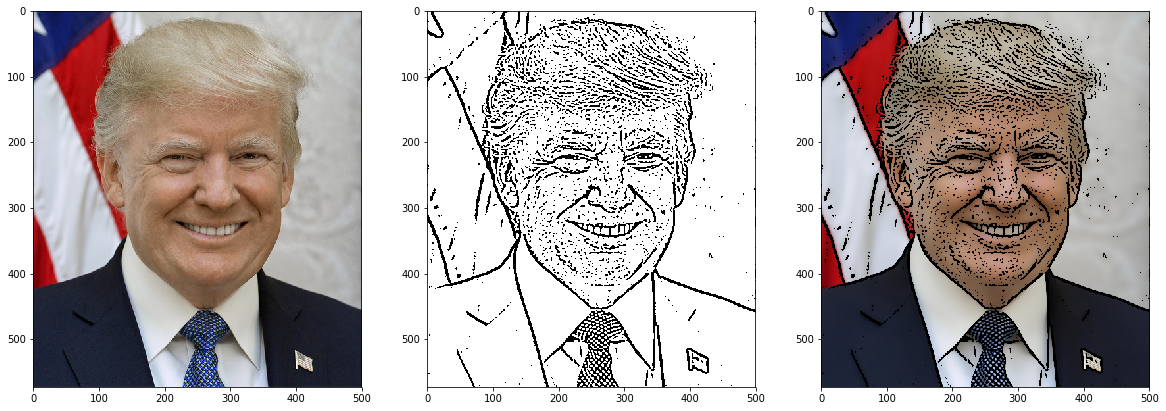

In [8]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(pencilSketchImage[::1]);
plt.subplot(133);plt.imshow(cartoonImage[:,:,::-1]);